In [1]:
!pip install numpy pandas matplotlib seaborn scipy
!pip install astroquery astropy lightkurve
!pip install openpyxl pymc arviz plotly streamlit

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 3.5 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=3cfb5dd874c7164c0f8cb9657428c5984e556adca06e7bafdc6274f78311f37c
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622

In [2]:
%pip install astroquery astropy lightkurve

In [3]:
import sys
print(sys.executable)

/usr/bin/python3


In [4]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

In [5]:
# -----------------------
# 1. Import libraries
# -----------------------
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

# -----------------------
# 2. Define columns we need
# -----------------------
cols = (
    "pl_name,hostname,disc_facility,discoverymethod,disc_year,"
    "st_teff,st_met,st_rotp,st_mass,st_rad,"
    "sy_pnum,sy_snum,sy_dist"
)

# -----------------------
# 3. Query Kepler planets
# -----------------------
kepler = NasaExoplanetArchive.query_criteria(
    table="pscomppars",
    select=cols,
    where="disc_facility like '%Kepler%'"
)
kepler_df = kepler.to_pandas()
kepler_df["survey"] = "Kepler"

# -----------------------
# 4. Query TESS planets
# -----------------------
tess = NasaExoplanetArchive.query_criteria(
    table="pscomppars",
    select=cols,
    where="disc_facility like '%TESS%'"
)
tess_df = tess.to_pandas()
tess_df["survey"] = "TESS"

# -----------------------
# 5. Preview results
# -----------------------
print("✅ Connected to NASA Exoplanet Archive")
print("Kepler planets:", len(kepler_df))
print("TESS planets:", len(tess_df))

display(kepler_df.head())
display(tess_df.head())

✅ Connected to NASA Exoplanet Archive
Kepler planets: 2784
TESS planets: 710


pl_name     hostname disc_facility discoverymethod  disc_year  \
0  Kepler-1167 b  Kepler-1167        Kepler         Transit       2016   
1  Kepler-1740 b  Kepler-1740        Kepler         Transit       2021   
2  Kepler-1581 b  Kepler-1581        Kepler         Transit       2016   
3   Kepler-644 b   Kepler-644        Kepler         Transit       2016   
4  Kepler-1752 b  Kepler-1752        Kepler         Transit       2021   

   st_teff  st_met  st_rotp  st_mass  st_rad  sy_pnum  sy_snum   sy_dist  \
0   4971.0   -0.05      NaN    0.790   0.750        1        1   820.905   
1   5705.0   -0.06      NaN    0.943   0.905        1        1  1061.770   
2   6022.0    0.07      NaN    1.120   1.230        1        1   493.175   
3   6747.0    0.08      NaN    1.490   1.810        1        1  1318.050   
4   5446.0   -0.20      NaN    0.824   0.821        1        1   962.888   

   survey  
0  Kepler  
1  Kepler  
2  Kepler  
3  Kepler  
4  Kepler

pl_name   hostname                                 disc_facility  \
0  HD 221416 b  HD 221416  Transiting Exoplanet Survey Satellite (TESS)   
1    TOI-756 b    TOI-756  Transiting Exoplanet Survey Satellite (TESS)   
2   HD 63433 c   HD 63433  Transiting Exoplanet Survey Satellite (TESS)   
3    TOI-269 b    TOI-269  Transiting Exoplanet Survey Satellite (TESS)   
4    TOI-421 b    TOI-421  Transiting Exoplanet Survey Satellite (TESS)   

  discoverymethod  disc_year  st_teff  st_met  st_rotp  st_mass  st_rad  \
0         Transit       2019   5080.0  -0.080      NaN   1.2120   2.943   
1         Transit       2025   3657.0   0.196      NaN   0.5050   0.505   
2         Transit       2020   5553.0  -0.070      6.4   0.9560   0.934   
3         Transit       2021   3514.0  -0.290      NaN   0.3917   0.398   
4         Transit       2020   5291.0  -0.044     39.6   0.8330   0.866   

   sy_pnum  sy_snum  sy_dist survey  
0        1        1  95.5483   TESS  
1        2        1  86.1759   TESS  
2        3        1  22.4035   TESS  
3        1        1  57.0225   TESS  
4        2        2  74.7969   TESS

In [6]:
# -----------------------
# 1. Import libraries
# -----------------------
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

# -----------------------
# 2. Define columns we need
# -----------------------
cols = (
    "pl_name,hostname,disc_facility,discoverymethod,disc_year,"
    "st_teff,st_met,st_rotp,st_mass,st_rad,"
    "sy_pnum,sy_snum,sy_dist"
)

# -----------------------
# 3. Query Kepler planets
# -----------------------
kepler = NasaExoplanetArchive.query_criteria(
    table="pscomppars",
    select=cols,
    where="disc_facility like '%Kepler%'"
)
kepler_df = kepler.to_pandas()
kepler_df["survey"] = "Kepler"

# -----------------------
# 4. Query TESS planets
# -----------------------
tess = NasaExoplanetArchive.query_criteria(
    table="pscomppars",
    select=cols,
    where="disc_facility like '%TESS%'"
)
tess_df = tess.to_pandas()
tess_df["survey"] = "TESS"

# -----------------------
# 5. Save results to CSV
# -----------------------
kepler_df.to_csv("kepler_exoplanets.csv", index=False)
tess_df.to_csv("tess_exoplanets.csv", index=False)

# Optional: combine both into one file
all_exoplanets = pd.concat([kepler_df, tess_df], ignore_index=True)
all_exoplanets.to_csv("all_exoplanets.csv", index=False)

# -----------------------
# 6. Preview results
# -----------------------
print("✅ Connected to NASA Exoplanet Archive and saved data")
print("Kepler planets:", len(kepler_df))
print("TESS planets:", len(tess_df))
print("Total combined:", len(all_exoplanets))

display(all_exoplanets.head())

✅ Connected to NASA Exoplanet Archive and saved data
Kepler planets: 2784
TESS planets: 710
Total combined: 3494


pl_name     hostname disc_facility discoverymethod  disc_year  \
0  Kepler-1167 b  Kepler-1167        Kepler         Transit       2016   
1  Kepler-1740 b  Kepler-1740        Kepler         Transit       2021   
2  Kepler-1581 b  Kepler-1581        Kepler         Transit       2016   
3   Kepler-644 b   Kepler-644        Kepler         Transit       2016   
4  Kepler-1752 b  Kepler-1752        Kepler         Transit       2021   

   st_teff  st_met  st_rotp  st_mass  st_rad  sy_pnum  sy_snum   sy_dist  \
0   4971.0   -0.05      NaN    0.790   0.750        1        1   820.905   
1   5705.0   -0.06      NaN    0.943   0.905        1        1  1061.770   
2   6022.0    0.07      NaN    1.120   1.230        1        1   493.175   
3   6747.0    0.08      NaN    1.490   1.810        1        1  1318.050   
4   5446.0   -0.20      NaN    0.824   0.821        1        1   962.888   

   survey  
0  Kepler  
1  Kepler  
2  Kepler  
3  Kepler  
4  Kepler

In [7]:
# Week 2: Cleaning and Merging Host-Star Parameters
import os
os.listdir()

['.config',
 'tess_exoplanets.csv',
 'all_exoplanets.csv',
 'kepler_exoplanets.csv',
 'sample_data']

In [8]:
import pandas as pd

# load planet catalogs
kepler_planets = pd.read_csv("kepler_exoplanets.csv", low_memory=False)
tess_planets = pd.read_csv("tess_exoplanets.csv", low_memory=False)

print("Kepler planets:", kepler_planets.shape)
print("TESS planets:", tess_planets.shape)

# peek columns
print(kepler_planets.columns[:20])
print(tess_planets.columns[:20])

Kepler planets: (2784, 14)
TESS planets: (710, 14)
Index(['pl_name', 'hostname', 'disc_facility', 'discoverymethod', 'disc_year',
       'st_teff', 'st_met', 'st_rotp', 'st_mass', 'st_rad', 'sy_pnum',
       'sy_snum', 'sy_dist', 'survey'],
      dtype='object')
Index(['pl_name', 'hostname', 'disc_facility', 'discoverymethod', 'disc_year',
       'st_teff', 'st_met', 'st_rotp', 'st_mass', 'st_rad', 'sy_pnum',
       'sy_snum', 'sy_dist', 'survey'],
      dtype='object')


In [9]:
# select key columns
kepler_clean = kepler_planets[['hostname', 'st_teff', 'st_met', 'st_rotp']].copy()
tess_clean = tess_planets[['hostname', 'st_teff', 'st_met', 'st_rotp']].copy()

# add mission column
kepler_clean['mission'] = 'Kepler'
tess_clean['mission'] = 'TESS'

In [10]:
merged_stars = pd.concat([kepler_clean, tess_clean], ignore_index=True)

print("Merged shape:", merged_stars.shape)
print(merged_stars.head())

Merged shape: (3494, 5)
      hostname  st_teff  st_met  st_rotp mission
0  Kepler-1167   4971.0   -0.05      NaN  Kepler
1  Kepler-1740   5705.0   -0.06      NaN  Kepler
2  Kepler-1581   6022.0    0.07      NaN  Kepler
3   Kepler-644   6747.0    0.08      NaN  Kepler
4  Kepler-1752   5446.0   -0.20      NaN  Kepler


In [11]:
merged_stars = merged_stars.drop_duplicates(subset=['hostname'])
print("Unique stars:", merged_stars.shape)

Unique stars: (2570, 5)


In [12]:
print(merged_stars['mission'].value_counts())

mission
Kepler    1983
TESS       587
Name: count, dtype: int64


In [13]:
print("Missing metallicity:", merged_stars['st_met'].isna().sum())
print("Missing rotation period:", merged_stars['st_rotp'].isna().sum())

Missing metallicity: 51
Missing rotation period: 2345


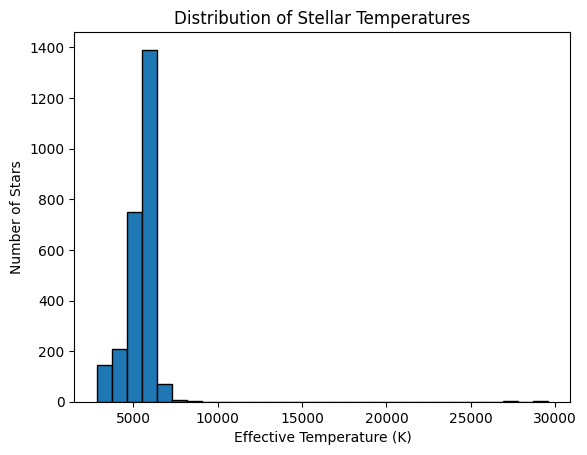

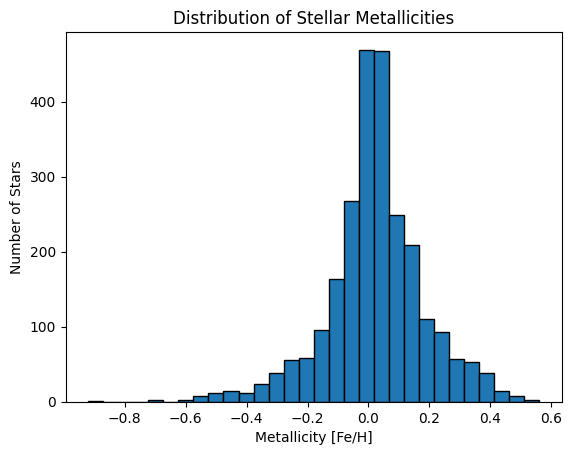

In [14]:
import matplotlib.pyplot as plt

# Histogram: Stellar Temperature
plt.hist(merged_stars['st_teff'].dropna(), bins=30, edgecolor='black')
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Number of Stars")
plt.title("Distribution of Stellar Temperatures")
plt.show()

# Histogram: Stellar Metallicity
plt.hist(merged_stars['st_met'].dropna(), bins=30, edgecolor='black')
plt.xlabel("Metallicity [Fe/H]")
plt.ylabel("Number of Stars")
plt.title("Distribution of Stellar Metallicities")
plt.show()

# Pie chart

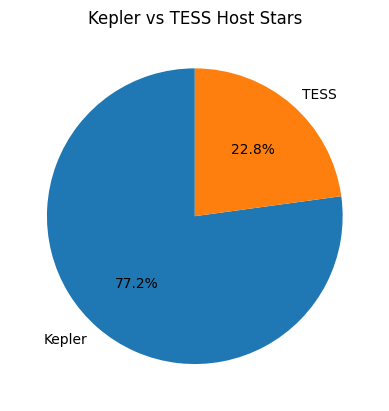

In [15]:
# Pie chart: Mission Contribution
mission_counts = merged_stars['mission'].value_counts()
plt.pie(mission_counts, labels=mission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Kepler vs TESS Host Stars")
plt.show()

In [16]:
# Week 3: Added automated cleaning pipeline and cleaned dataset
import pandas as pd

def clean_exoplanet_data(kepler_file, tess_file, output_file, convert_units=False):
    """
    Automated data-cleaning pipeline for Kepler and TESS datasets.

    Steps:
    1. Load datasets.
    2. Add 'mission' column.
    3. Merge and deduplicate by host star.
    4. Handle missing metallicity and distance.
    5. Drop sparse rotation column.
    6. Optional unit conversions.
    7. Save cleaned CSV for reproducibility.
    """
    # Load CSVs
    kepler = pd.read_csv(kepler_file)
    tess   = pd.read_csv(tess_file)

    # Add source column
    kepler['mission'] = 'Kepler'
    tess['mission']   = 'TESS'

    # Merge datasets
    merged = pd.concat([kepler, tess], ignore_index=True)
    merged = merged.drop_duplicates(subset='hostname')

    # Drop sparse rotation column
    if 'st_rotp' in merged.columns:
        merged = merged.drop(columns=['st_rotp'])

    # Fill missing values
    if 'st_met' in merged.columns:
        merged['st_met'] = merged['st_met'].fillna(merged['st_met'].median())
    if 'sy_dist' in merged.columns:
        merged['sy_dist'] = merged['sy_dist'].fillna(merged['sy_dist'].median())

    # Optional unit conversions
    if convert_units:
        merged['sy_dist_ly'] = merged['sy_dist'] * 3.26156
        merged['st_mass_kg'] = merged['st_mass'] * 1.9885e30
        merged['st_rad_m']   = merged['st_rad'] * 6.957e8

    # Keep relevant columns
    cols = ['pl_name', 'hostname', 'st_teff', 'st_met', 'st_mass', 'st_rad',
            'sy_dist', 'disc_year', 'discoverymethod', 'mission']
    if convert_units:
        cols += ['sy_dist_ly', 'st_mass_kg', 'st_rad_m']

    clean_df = merged[cols]

    # Save cleaned CSV
    clean_df.to_csv(output_file, index=False)
    print(f"Cleaning complete! Saved to {output_file}")

    return clean_df

# --- Example usage ---
kepler_file = 'kepler_exoplanets.csv'
tess_file   = 'tess_exoplanets.csv'
output_file = 'clean_exoplanets.csv'

clean_data = clean_exoplanet_data(kepler_file, tess_file, output_file, convert_units=True)

Cleaning complete! Saved to clean_exoplanets.csv


In [17]:
# WEEK 4: Clean datasets and compute planet occurrence per host star
import pandas as pd
from datetime import datetime

def clean_and_count_planets(kepler_file, tess_file, output_file, convert_units=True):
    """
    Clean Kepler and TESS datasets and compute true planet occurrence per host star.
    """
    # --- 1. Load CSVs ---
    kepler = pd.read_csv(kepler_file)
    tess   = pd.read_csv(tess_file)

    # Add mission/source column
    kepler['mission'] = 'Kepler'
    tess['mission']   = 'TESS'

    # --- 2. Merge datasets ---
    merged = pd.concat([kepler, tess], ignore_index=True)

    # --- 3. Drop sparse rotation column if exists ---
    if 'st_rotp' in merged.columns:
        merged = merged.drop(columns=['st_rotp'])

    # --- 4. Fill missing values ---
    if 'st_met' in merged.columns:
        merged['st_met'] = merged['st_met'].fillna(merged['st_met'].median())
    if 'sy_dist' in merged.columns:
        merged['sy_dist'] = merged['sy_dist'].fillna(merged['sy_dist'].median())

    # --- 5. Optional unit conversions ---
    if convert_units:
        merged['sy_dist_ly'] = merged['sy_dist'] * 3.26156
        merged['st_mass_kg'] = merged['st_mass'] * 1.9885e30
        merged['st_rad_m']   = merged['st_rad'] * 6.957e8

    # --- 6. Count planets per host star ---
    planet_counts = merged.groupby('hostname').size().reset_index(name='planet_count')

    # --- 7. Keep one row per star and merge counts ---
    cols = ['hostname', 'st_teff', 'st_met', 'st_mass', 'st_rad',
            'sy_dist', 'disc_year', 'discoverymethod', 'mission']
    if convert_units:
        cols += ['sy_dist_ly', 'st_mass_kg', 'st_rad_m']

    # Keep only one row per host star for modeling
    merged_unique = merged.drop_duplicates(subset='hostname')[cols].copy()

    # Merge planet counts
    merged_unique = pd.merge(merged_unique, planet_counts, on='hostname', how='left')

    # --- 8. Add derived columns ---
    # Metallicity class
    bins = [-float('inf'), -0.5, 0.0, 0.5, float('inf')]
    labels = ['low', 'sub-solar', 'solar', 'high']
    merged_unique['metallicity_class'] = pd.cut(merged_unique['st_met'], bins=bins, labels=labels)

    # Spectral type by temperature
    temp_bins = [0, 4000, 5200, 6000, 7500, float('inf')]
    temp_labels = ['M', 'K', 'G', 'F', 'A']
    merged_unique['spectral_type'] = pd.cut(merged_unique['st_teff'], bins=temp_bins, labels=temp_labels)

    # --- 9. Add timestamp ---
    merged_unique['last_updated'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # --- 10. Save final dataset ---
    merged_unique.to_csv(output_file, index=False)
    print(f"Final cleaned dataset with true planet counts saved to {output_file}")

    return merged_unique

# --- Run the updated pipeline ---
kepler_file = 'kepler_exoplanets.csv'
tess_file   = 'tess_exoplanets.csv'
output_file = 'final_occurrence_dataset_multi.csv'

final_dataset = clean_and_count_planets(kepler_file, tess_file, output_file, convert_units=True)

Final cleaned dataset with true planet counts saved to final_occurrence_dataset_multi.csv


In [18]:
import pandas as pd

# Load the updated dataset
df = pd.read_csv('final_occurrence_dataset_multi.csv')

# Count stars by number of planets
planet_count_summary = df['planet_count'].value_counts().sort_index()

print("Planet Count Distribution:")
print(planet_count_summary)

# Percentage of multi-planet systems
total_stars = len(df)
multi_planet_stars = planet_count_summary[planet_count_summary.index > 1].sum()
percent_multi = (multi_planet_stars / total_stars) * 100

print(f"\nTotal stars: {total_stars}")
print(f"Stars with >1 planet: {multi_planet_stars} ({percent_multi:.2f}%)")

Planet Count Distribution:
planet_count
1    1962
2     393
3     142
4      51
5      18
6       3
8       1
Name: count, dtype: int64

Total stars: 2570
Stars with >1 planet: 608 (23.66%)


In [19]:
import pandas as pd

df = pd.read_csv('final_occurrence_dataset_multi.csv')

# --- 1. Normalized Stellar Properties (optional but helps modeling) ---
df['st_teff_norm'] = (df['st_teff'] - df['st_teff'].mean()) / df['st_teff'].std()
df['st_met_norm']  = (df['st_met'] - df['st_met'].mean()) / df['st_met'].std()
df['st_mass_norm'] = (df['st_mass'] - df['st_mass'].mean()) / df['st_mass'].std()
df['st_rad_norm']  = (df['st_rad'] - df['st_rad'].mean()) / df['st_rad'].std()

# --- 2. Detection Survey Flags (if needed for Bayesian priors) ---
# Already have 'mission' column: Kepler/TESS

# --- 3. Optional: Planet occurrence categories ---
# e.g., low, medium, high number of planets
bins = [0, 1, 3, float('inf')]
labels = ['single', 'few', 'many']
df['planet_occurrence_class'] = pd.cut(df['planet_count'], bins=bins, labels=labels)

# --- 4. Save the final pre-Bayesian dataset ---
df.to_csv('final_dataset_pre_bayesian.csv', index=False)
print("Final dataset pre-Bayesian saved as 'final_dataset_pre_bayesian.csv'")

Final dataset pre-Bayesian saved as 'final_dataset_pre_bayesian.csv'


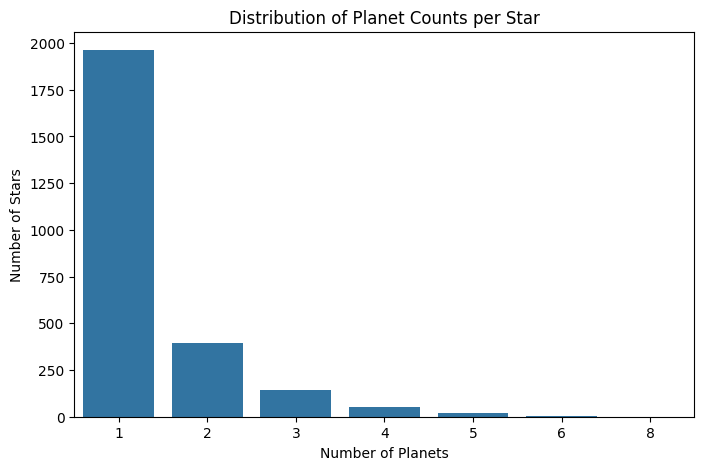

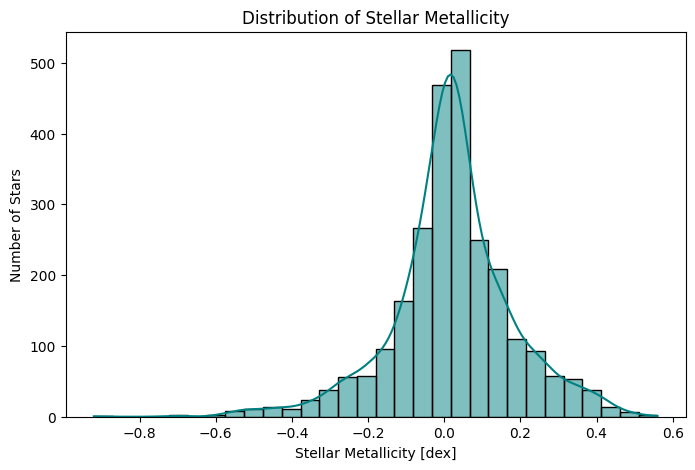

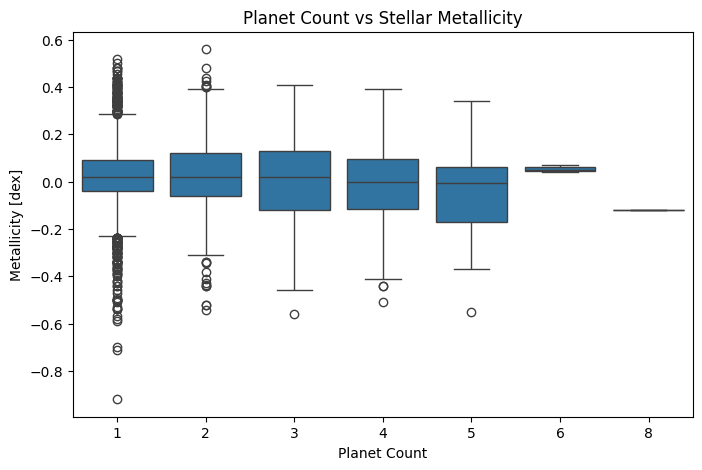

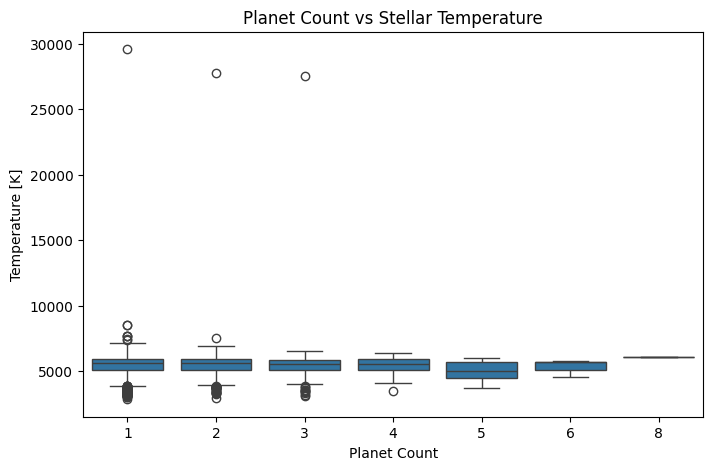

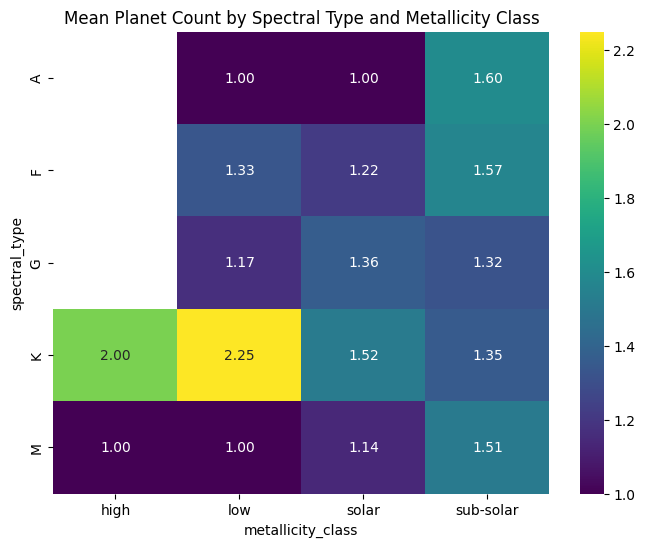

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('final_dataset_pre_bayesian.csv')

# --- 1. Planet Count Histogram ---
plt.figure(figsize=(8,5))
sns.countplot(x='planet_count', data=df)  # Removed palette
plt.title("Distribution of Planet Counts per Star")
plt.xlabel("Number of Planets")
plt.ylabel("Number of Stars")
plt.show()

# --- 2. Histogram of Stellar Metallicity ---
plt.figure(figsize=(8,5))
sns.histplot(df['st_met'], bins=30, kde=True, color='teal')
plt.title("Distribution of Stellar Metallicity")
plt.xlabel("Stellar Metallicity [dex]")
plt.ylabel("Number of Stars")
plt.show()

# --- 3. Boxplot: Planet Count vs Metallicity ---
plt.figure(figsize=(8,5))
sns.boxplot(x='planet_count', y='st_met', data=df)  # Removed palette
plt.title("Planet Count vs Stellar Metallicity")
plt.xlabel("Planet Count")
plt.ylabel("Metallicity [dex]")
plt.show()

# --- 4. Boxplot: Planet Count vs Stellar Temperature ---
plt.figure(figsize=(8,5))
sns.boxplot(x='planet_count', y='st_teff', data=df)  # Removed palette
plt.title("Planet Count vs Stellar Temperature")
plt.xlabel("Planet Count")
plt.ylabel("Temperature [K]")
plt.show()

# --- 5. Heatmap: Mean Planet Count by Spectral Type & Metallicity Class ---
pivot = df.pivot_table(values='planet_count', index='spectral_type', columns='metallicity_class', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Mean Planet Count by Spectral Type and Metallicity Class")
plt.show()

In [21]:
import pandas as pd
#QA PART#

df = pd.read_csv('final_dataset_pre_bayesian.csv')

print("=== Dataset Info ===")
print(df.info())

print("\n=== Check for Missing Values ===")
print(df.isnull().sum())

print("\n=== Basic Descriptive Statistics ===")
print(df[['planet_count', 'st_met', 'st_teff', 'st_mass', 'st_rad']].describe())

print("\n=== Planet Count Distribution ===")
print(df['planet_count'].value_counts().sort_index())

print("\n=== Multi-Planet Systems ===")
total_stars = len(df)
multi_planet_stars = df[df['planet_count'] > 1].shape[0]
percent_multi = (multi_planet_stars / total_stars) * 100
print(f"Total stars: {total_stars}")
print(f"Stars with >1 planet: {multi_planet_stars} ({percent_multi:.2f}%)")

print("\n=== Check Derived Columns ===")
print("Metallicity classes:", df['metallicity_class'].unique())
print("Spectral types:", df['spectral_type'].unique())
print("Planet occurrence classes:", df['planet_occurrence_class'].unique())

print("\n=== Check Normalized Columns ===")
print(df[['st_teff_norm', 'st_met_norm', 'st_mass_norm', 'st_rad_norm']].head())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hostname                 2570 non-null   object 
 1   st_teff                  2570 non-null   float64
 2   st_met                   2570 non-null   float64
 3   st_mass                  2570 non-null   float64
 4   st_rad                   2570 non-null   float64
 5   sy_dist                  2570 non-null   float64
 6   disc_year                2570 non-null   int64  
 7   discoverymethod          2570 non-null   object 
 8   mission                  2570 non-null   object 
 9   sy_dist_ly               2570 non-null   float64
 10  st_mass_kg               2570 non-null   float64
 11  st_rad_m                 2570 non-null   float64
 12  planet_count             2570 non-null   int64  
 13  metallicity_class        2570 non-null   object 
 14  spe

In [22]:
import pandas as pd

# QA PART

df = pd.read_csv('final_dataset_pre_bayesian.csv')

print("=== Dataset Info ===")
print(df.info())

print("\n=== Check for Missing Values ===")
print(df.isnull().sum())

print("\n=== Basic Descriptive Statistics ===")
print(df[['planet_count', 'st_met', 'st_teff', 'st_mass', 'st_rad']].describe())

print("\n=== Planet Count Distribution ===")
print(df['planet_count'].value_counts().sort_index())

print("\n=== Multi-Planet Systems ===")
total_stars = len(df)
multi_planet_stars = df[df['planet_count'] > 1].shape[0]
percent_multi = (multi_planet_stars / total_stars) * 100
print(f"Total stars: {total_stars}")
print(f"Stars with >1 planet: {multi_planet_stars} ({percent_multi:.2f}%)")

print("\n=== Check Derived Columns ===")
print("Metallicity classes:", df['metallicity_class'].unique())
print("Spectral types:", df['spectral_type'].unique())
print("Planet occurrence classes:", df['planet_occurrence_class'].unique())

print("\n=== Check Normalized Columns ===")
print(df[['st_teff_norm', 'st_met_norm', 'st_mass_norm', 'st_rad_norm']].head())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hostname                 2570 non-null   object 
 1   st_teff                  2570 non-null   float64
 2   st_met                   2570 non-null   float64
 3   st_mass                  2570 non-null   float64
 4   st_rad                   2570 non-null   float64
 5   sy_dist                  2570 non-null   float64
 6   disc_year                2570 non-null   int64  
 7   discoverymethod          2570 non-null   object 
 8   mission                  2570 non-null   object 
 9   sy_dist_ly               2570 non-null   float64
 10  st_mass_kg               2570 non-null   float64
 11  st_rad_m                 2570 non-null   float64
 12  planet_count             2570 non-null   int64  
 13  metallicity_class        2570 non-null   object 
 14  spe

Output()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha      0.305  0.017   0.273    0.336        0.0      0.0    3125.0   
beta_teff  0.022  0.017  -0.009    0.052        0.0      0.0    3239.0   
beta_met  -0.016  0.017  -0.048    0.018        0.0      0.0    3584.0   
beta_mass -0.048  0.020  -0.086   -0.011        0.0      0.0    3197.0   

           ess_tail  r_hat  
alpha        2968.0    1.0  
beta_teff    2847.0    1.0  
beta_met     3180.0    1.0  
beta_mass    3008.0    1.0

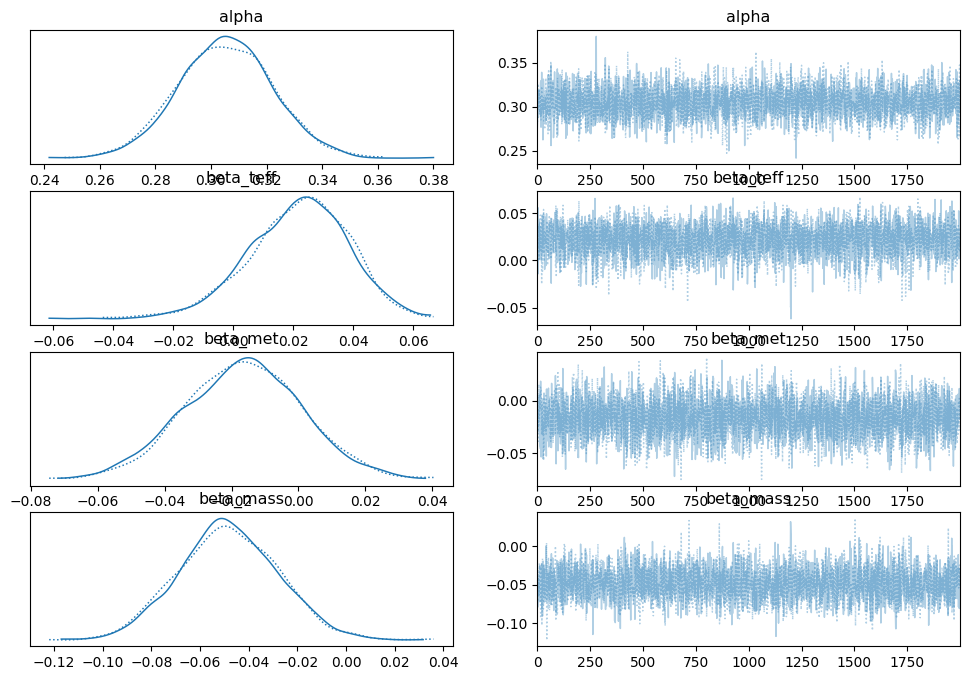

In [23]:
!pip install pymc arviz --quiet

import pymc as pm
import arviz as az
import numpy as np
import pandas as pd

# Load pre-Bayesian dataset
df = pd.read_csv('final_dataset_pre_bayesian.csv')

# Use normalized features
X_teff = df['st_teff_norm'].values
X_met  = df['st_met_norm'].values
X_mass = df['st_mass_norm'].values
planet_counts = df['planet_count'].values

with pm.Model() as model:
    # Priors for coefficients
    beta_teff = pm.Normal("beta_teff", mu=0, sigma=1)
    beta_met  = pm.Normal("beta_met", mu=0, sigma=1)
    beta_mass = pm.Normal("beta_mass", mu=0, sigma=1)

    # Intercept
    alpha = pm.Normal("alpha", mu=0, sigma=1)

    # Linear model
    lambda_ = pm.math.exp(alpha + beta_teff*X_teff + beta_met*X_met + beta_mass*X_mass)

    # Likelihood (Poisson for counts)
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=planet_counts)

    # Sample from posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Diagnostics & posterior plots
az.plot_trace(trace, var_names=["alpha", "beta_teff", "beta_met", "beta_mass"])
az.summary(trace, var_names=["alpha", "beta_teff", "beta_met", "beta_mass"])

In [24]:
import pandas as pd

df = pd.read_csv('final_dataset_pre_bayesian.csv')
print(df.columns)

Index(['hostname', 'st_teff', 'st_met', 'st_mass', 'st_rad', 'sy_dist',
       'disc_year', 'discoverymethod', 'mission', 'sy_dist_ly', 'st_mass_kg',
       'st_rad_m', 'planet_count', 'metallicity_class', 'spectral_type',
       'last_updated', 'st_teff_norm', 'st_met_norm', 'st_mass_norm',
       'st_rad_norm', 'planet_occurrence_class'],
      dtype='object')


Output()

ERROR:pymc.stats.convergence:There were 86 divergences after tuning. Increase `target_accept` or reparameterize.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_a       0.225  0.357  -0.576    0.885      0.010    0.019    1581.0   
sigma_a    0.448  0.479   0.028    1.280      0.013    0.020     974.0   
beta_met  -0.004  0.019  -0.038    0.032      0.000    0.000    2186.0   
beta_teff  0.019  0.017  -0.013    0.050      0.000    0.000    2731.0   
beta_mass -0.089  0.034  -0.151   -0.026      0.001    0.001    1960.0   
beta_rad   0.037  0.029  -0.017    0.092      0.001    0.000    2262.0   

           ess_tail  r_hat  
mu_a         1153.0    1.0  
sigma_a       758.0    1.0  
beta_met     1797.0    1.0  
beta_teff    2110.0    1.0  
beta_mass    2307.0    1.0  
beta_rad     2391.0    1.0

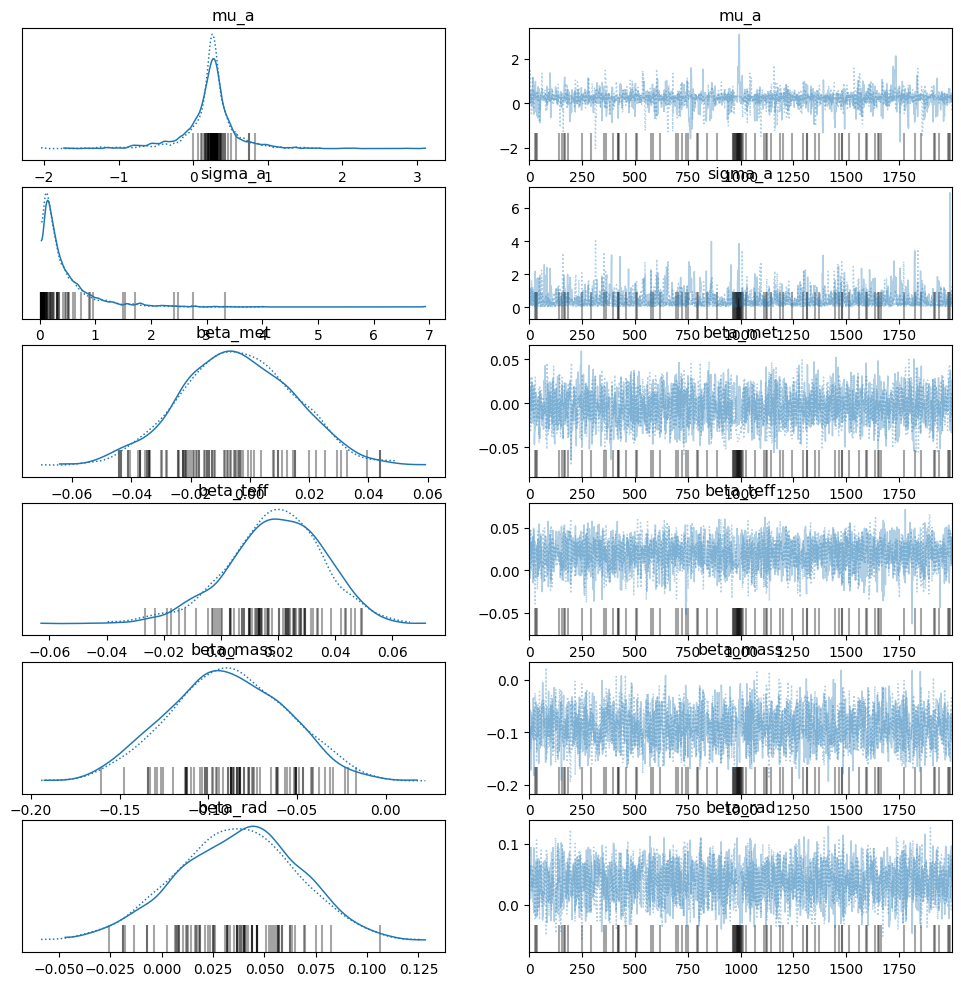

In [25]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('final_dataset_pre_bayesian.csv')

# Encode survey as index for hierarchical model
survey_codes, survey_idx = np.unique(df['mission'], return_inverse=True)

# Predictors
X_met  = df['st_met_norm'].values
X_teff = df['st_teff_norm'].values
X_mass = df['st_mass_norm'].values
X_rad  = df['st_rad_norm'].values
y_planets = df['planet_count'].values

# Number of surveys
n_survey = len(survey_codes)

with pm.Model() as hierarchical_model:

    # Hyperpriors for survey-level intercepts
    mu_a = pm.Normal("mu_a", mu=0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1.0)

    # Survey-level intercepts
    a_survey = pm.Normal("a_survey", mu=mu_a, sigma=sigma_a, shape=n_survey)

    # Coefficients for predictors (fixed effects)
    beta_met  = pm.Normal("beta_met", mu=0, sigma=1)
    beta_teff = pm.Normal("beta_teff", mu=0, sigma=1)
    beta_mass = pm.Normal("beta_mass", mu=0, sigma=1)
    beta_rad  = pm.Normal("beta_rad", mu=0, sigma=1)

    # Linear model with survey-level intercept
    lambda_ = pm.math.exp(a_survey[survey_idx] +
                          beta_met*X_met +
                          beta_teff*X_teff +
                          beta_mass*X_mass +
                          beta_rad*X_rad)

    # Likelihood: Poisson
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=y_planets)

    # Sample posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Diagnostics
az.plot_trace(trace, var_names=["mu_a","sigma_a","beta_met","beta_teff","beta_mass","beta_rad"])
az.summary(trace, var_names=["mu_a","sigma_a","beta_met","beta_teff","beta_mass","beta_rad"])

            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
beta_met  -0.004  0.019    -0.041      0.031      0.000    0.000    2186.0   
beta_teff  0.019  0.017    -0.014      0.051      0.000    0.000    2731.0   
beta_mass -0.089  0.034    -0.153     -0.024      0.001    0.001    1960.0   
beta_rad   0.037  0.029    -0.019      0.094      0.001    0.000    2262.0   
mu_a       0.225  0.357    -0.576      0.985      0.010    0.019    1581.0   
sigma_a    0.448  0.479     0.028      1.383      0.013    0.020     974.0   

           ess_tail  r_hat  
beta_met     1797.0    1.0  
beta_teff    2110.0    1.0  
beta_mass    2307.0    1.0  
beta_rad     2391.0    1.0  
mu_a         1153.0    1.0  
sigma_a       758.0    1.0  


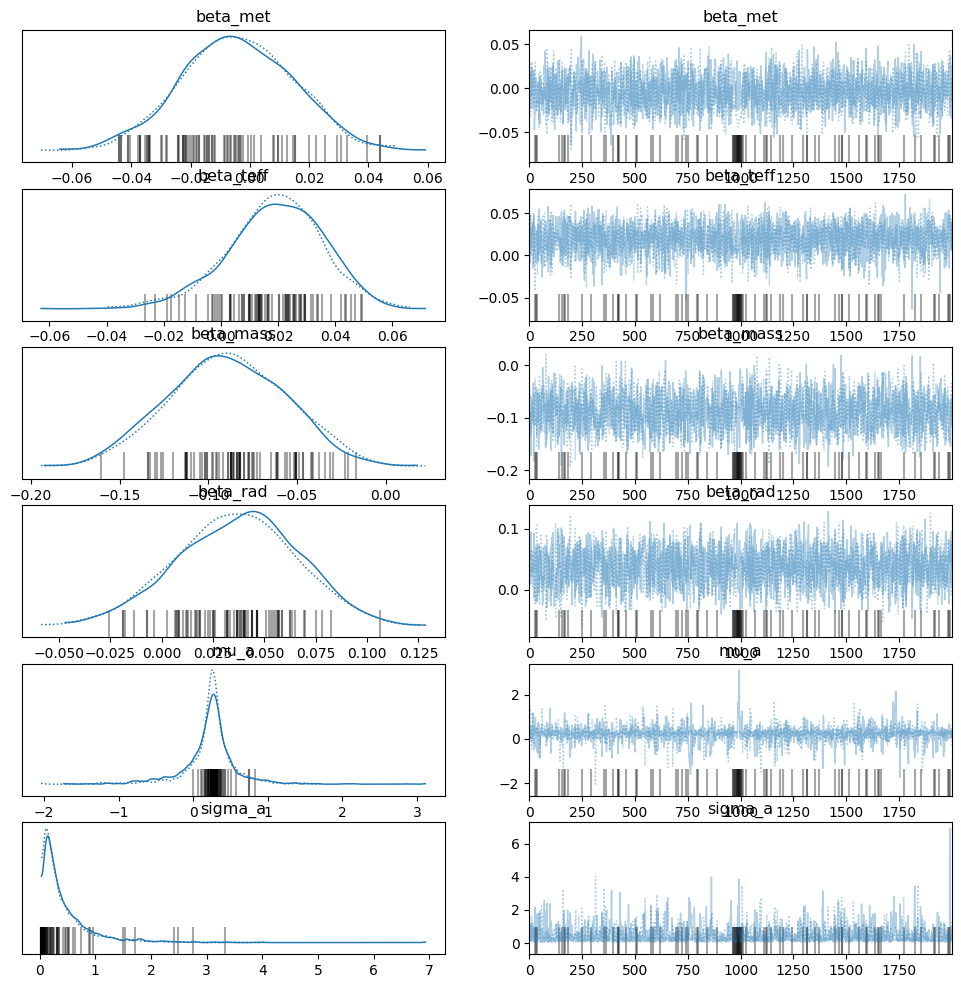

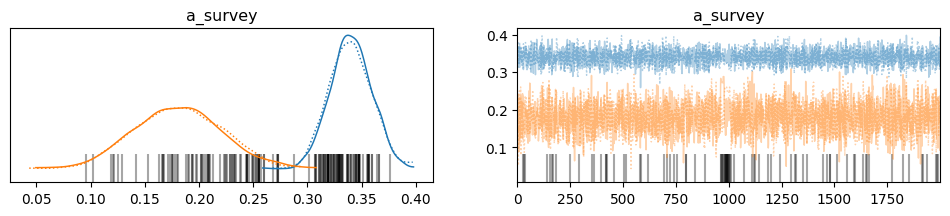

In [26]:
import arviz as az
import plotly.express as px
import pandas as pd

# --- Posterior object from Step 1 ---
posterior = trace.posterior

# =========================
# 1️⃣ Trace Plots for Convergence
# =========================
coef_cols = ["beta_met","beta_teff","beta_mass","beta_rad"]
az.plot_trace(trace, var_names=coef_cols + ["mu_a","sigma_a"])
az.plot_trace(trace, var_names=["a_survey"])
# Optional: plt.show() if needed

# =========================
# 2️⃣ Posterior Summary with 95% HDI
# =========================
summary_df = az.summary(trace, var_names=coef_cols + ["mu_a","sigma_a"], hdi_prob=0.95)
print(summary_df)
summary_df.to_csv("posterior_coefficients_summary.csv", index=True)

# =========================
# 3️⃣ Flatten posterior for interactive plotting
# =========================
posterior_flat = posterior.to_dataframe().reset_index()

# =========================
# 4️⃣ Interactive Posterior Histograms for Fixed-Effect Coefficients
# =========================
for coef in coef_cols:
    samples = posterior_flat[coef].values
    hdi = az.hdi(samples, hdi_prob=0.95)

    fig = px.histogram(samples, nbins=50, marginal="box",
                       title=f"Posterior Distribution of {coef}",
                       labels={coef: coef})
    # Add 95% HDI lines
    fig.add_vline(x=hdi[0], line_dash="dash", line_color="red", annotation_text="HDI 2.5%")
    fig.add_vline(x=hdi[1], line_dash="dash", line_color="red", annotation_text="HDI 97.5%")
    fig.show()

# =========================
# 5️⃣ Survey-Level Intercepts (Combined Violin Plot) - Fixed
# =========================
df_data = pd.read_csv('final_dataset_pre_bayesian.csv')
survey_names = df_data['mission'].unique()

survey_samples = []
for i, survey in enumerate(survey_names):
    vals = posterior_flat.loc[posterior_flat['a_survey_dim_0'] == i, 'a_survey'].values
    survey_samples.append(pd.DataFrame({"survey": survey, "value": vals}))

survey_df = pd.concat(survey_samples, ignore_index=True)

fig = px.violin(survey_df, x="survey", y="value", box=True, points="all",
                title="Posterior Distribution of Survey-Level Intercepts",
                labels={"value": "Intercept"})
fig.show()

Output()

/tmp/ipython-input-3574220168.py:22: FutureWarning:

hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions



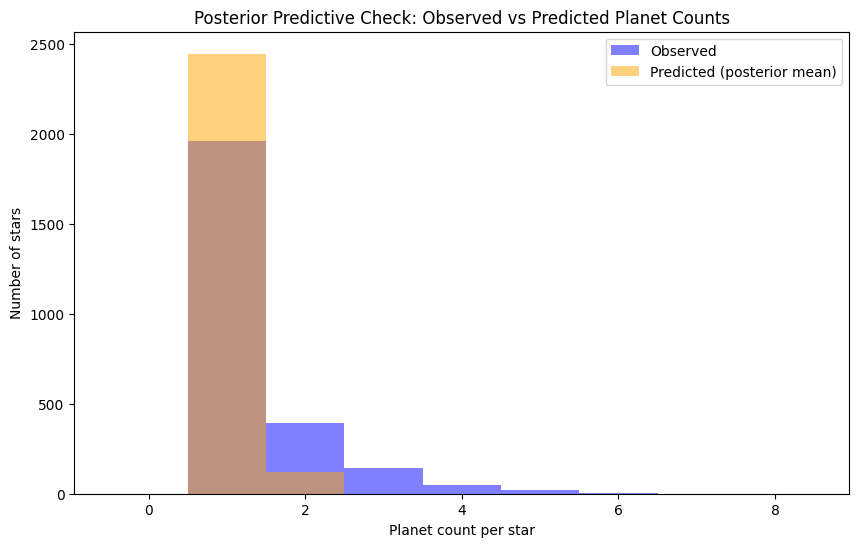

In [27]:
# ===============================
# Step 3: Posterior Predictive Checks
# ===============================

import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# --- 1️⃣ Posterior predictive sampling ---
with hierarchical_model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"], random_seed=42)

# --- 2️⃣ Prepare posterior predictive samples ---
# Stack chain and draw dimensions -> shape (n_samples, n_stars)
ppc_samples = ppc.posterior_predictive["y_obs"].stack(sample=("chain","draw")).values.T

# Compute mean and 95% HDI per star
ppc_mean = ppc_samples.mean(axis=0)          # mean predicted planet count per star
ppc_hdi = az.hdi(ppc_samples, hdi_prob=0.95) # 95% credible interval per star

# --- 3️⃣ Observed planet counts ---
df_data = pd.read_csv('final_dataset_pre_bayesian.csv')
observed = df_data['planet_count'].values

# Safety check
assert len(observed) == len(ppc_mean) == len(ppc_hdi), "Array lengths do not match!"

# =========================
# 4️⃣ Matplotlib Histogram Overlay: Observed vs Predicted
# =========================
plt.figure(figsize=(10,6))
plt.hist(observed, bins=np.arange(observed.max()+2)-0.5, alpha=0.5, label="Observed", color="blue")
plt.hist(ppc_mean, bins=np.arange(observed.max()+2)-0.5, alpha=0.5, label="Predicted (posterior mean)", color="orange")
plt.xlabel("Planet count per star")
plt.ylabel("Number of stars")
plt.title("Posterior Predictive Check: Observed vs Predicted Planet Counts")
plt.legend()
plt.show()

# =========================
# 5️⃣ Interactive Plotly Scatter: Observed vs Predicted with 95% CI
# =========================
ppc_df = pd.DataFrame({
    "Observed": observed,
    "Predicted_mean": ppc_mean,
    "Predicted_HDI_low": ppc_hdi[:,0],
    "Predicted_HDI_high": ppc_hdi[:,1]
})

fig = px.scatter(ppc_df, x="Observed", y="Predicted_mean",
                 error_y=ppc_df["Predicted_HDI_high"]-ppc_df["Predicted_mean"],
                 error_y_minus=ppc_df["Predicted_mean"]-ppc_df["Predicted_HDI_low"],
                 labels={"Observed":"Observed planet count",
                         "Predicted_mean":"Predicted mean planet count"},
                 title="Posterior Predictive Check: Observed vs Predicted with 95% CI")

# Add 1:1 reference line
fig.add_shape(
    type="line", line=dict(dash="dash", color="red"),
    x0=0, x1=ppc_df["Observed"].max(),
    y0=0, y1=ppc_df["Observed"].max()
)
fig.show()

Output()

Output()

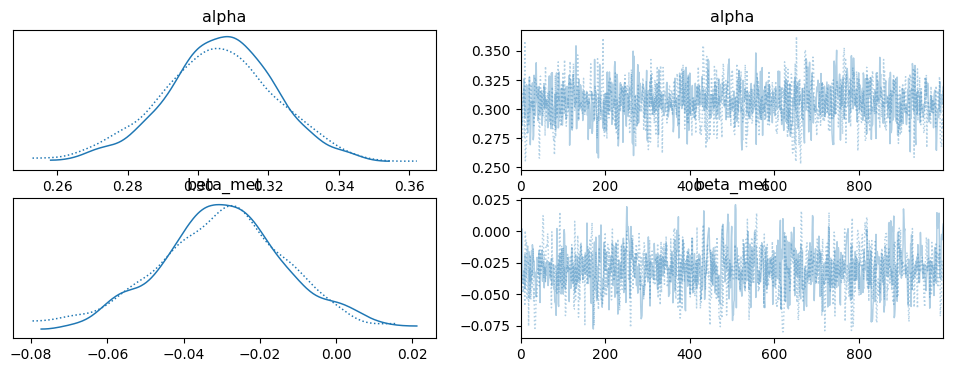

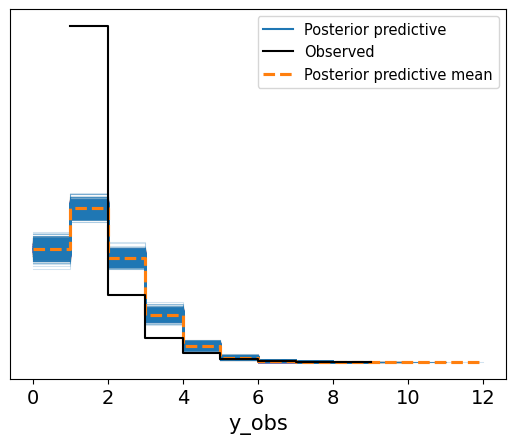

Output()

Output()

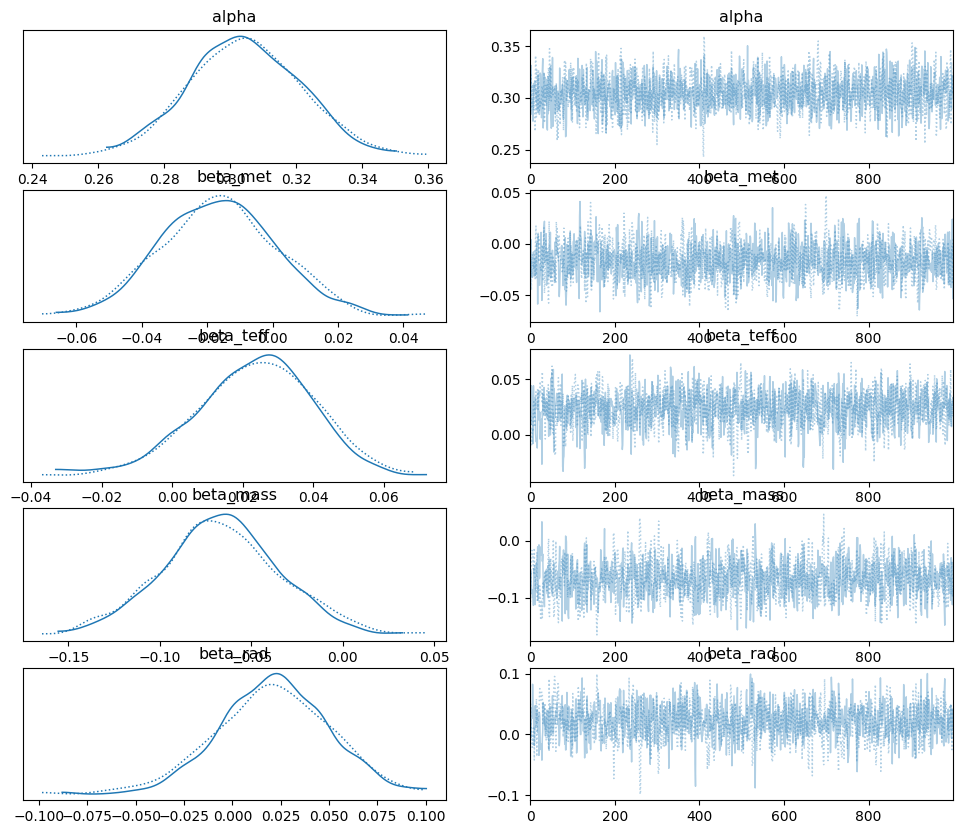

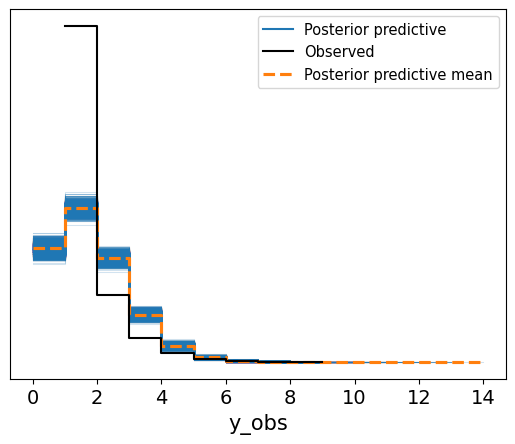

Output()

Output()

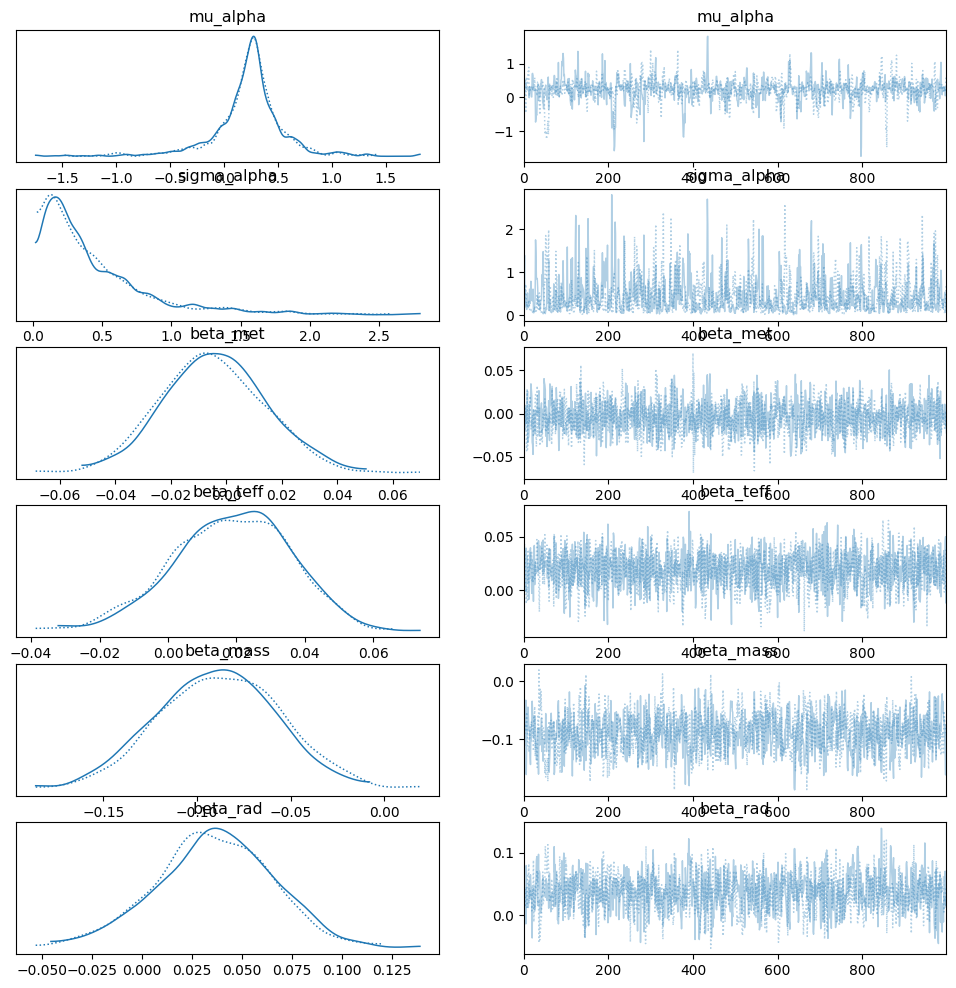

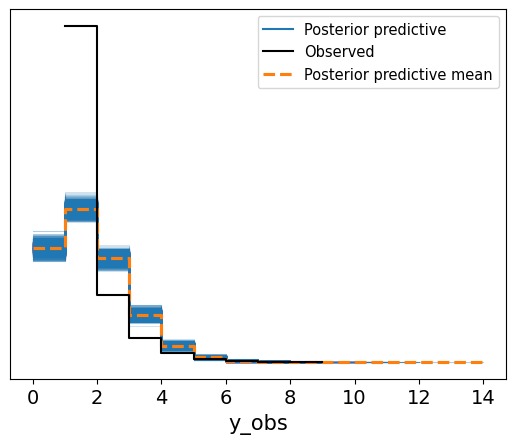

WAIC Single: Computed from 2000 posterior samples and 2570 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3226.22    27.88
p_waic        1.02        -
WAIC Multi: Computed from 2000 posterior samples and 2570 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3225.14    27.90
p_waic        2.16        -
WAIC Hier: Computed from 2000 posterior samples and 2570 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3218.63    27.55
p_waic        2.59        -
LOO Single: Computed from 2000 posterior samples and 2570 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -3226.22    27.88
p_loo        1.02        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     2570  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

LOO Multi: Computed from 2000 posterior samples and 2570 observations log-likelihood matrix.

  

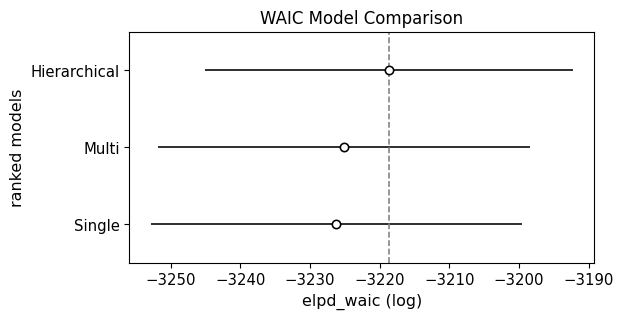

In [28]:
# ===============================
# Step 4: Model Comparison (Full Dashboard)
# ===============================
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load / prepare data ---
df = pd.read_csv("final_dataset_pre_bayesian.csv")
X_met = df["st_met_norm"].values
X_teff = df["st_teff_norm"].values
X_mass = df["st_mass_norm"].values
X_rad = df["st_rad_norm"].values
y_planets = df["planet_count"].values

survey_codes, survey_idx = np.unique(df["mission"], return_inverse=True)
n_survey = len(survey_codes)

# ===============================
# 1️⃣ Single Predictor Model
# ===============================
with pm.Model() as single_model:
    alpha = pm.Normal("alpha", mu=0, sigma=0.5)
    beta_met = pm.Normal("beta_met", mu=0, sigma=0.5)
    lambda_ = pm.math.exp(alpha + beta_met * X_met)
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=y_planets)
    idata_single = pm.sample(draws=1000, tune=1000, target_accept=0.99,
                             return_inferencedata=True, idata_kwargs={"log_likelihood": True},
                             random_seed=42)
    idata_single_ppc = pm.sample_posterior_predictive(idata_single, random_seed=42, return_inferencedata=True)

# -----------------------------
# Trace and PPC plots
# -----------------------------
az.plot_trace(idata_single, var_names=["alpha", "beta_met"], compact=True)
plt.show()
az.plot_ppc(idata_single_ppc)
plt.show()

# ===============================
# 2️⃣ Multi-Predictor Model
# ===============================
with pm.Model() as multi_model:
    alpha = pm.Normal("alpha", mu=0, sigma=0.5)
    beta_met = pm.Normal("beta_met", mu=0, sigma=0.5)
    beta_teff = pm.Normal("beta_teff", mu=0, sigma=0.5)
    beta_mass = pm.Normal("beta_mass", mu=0, sigma=0.5)
    beta_rad = pm.Normal("beta_rad", mu=0, sigma=0.5)
    lambda_ = pm.math.exp(alpha + beta_met*X_met + beta_teff*X_teff + beta_mass*X_mass + beta_rad*X_rad)
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=y_planets)
    idata_multi = pm.sample(draws=1000, tune=1000, target_accept=0.99,
                            return_inferencedata=True, idata_kwargs={"log_likelihood": True},
                            random_seed=42)
    idata_multi_ppc = pm.sample_posterior_predictive(idata_multi, random_seed=42, return_inferencedata=True)

# Trace and PPC plots
az.plot_trace(idata_multi, var_names=["alpha","beta_met","beta_teff","beta_mass","beta_rad"], compact=True)
plt.show()
az.plot_ppc(idata_multi_ppc)
plt.show()

# ===============================
# 3️⃣ Hierarchical Model
# ===============================
with pm.Model() as hier_model:
    mu_alpha = pm.Normal("mu_alpha", mu=0, sigma=1)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=1)
    alpha_offset = pm.Normal("alpha_offset", mu=0, sigma=1, shape=n_survey)
    alpha_group = pm.Deterministic("alpha_group", mu_alpha + alpha_offset * sigma_alpha)
    beta_met = pm.Normal("beta_met", mu=0, sigma=0.5)
    beta_teff = pm.Normal("beta_teff", mu=0, sigma=0.5)
    beta_mass = pm.Normal("beta_mass", mu=0, sigma=0.5)
    beta_rad = pm.Normal("beta_rad", mu=0, sigma=0.5)
    lambda_ = pm.math.exp(alpha_group[survey_idx] + beta_met*X_met + beta_teff*X_teff + beta_mass*X_mass + beta_rad*X_rad)
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=y_planets)
    idata_hier = pm.sample(draws=1000, tune=1000, target_accept=0.99,
                           return_inferencedata=True, idata_kwargs={"log_likelihood": True},
                           random_seed=42)
    idata_hier_ppc = pm.sample_posterior_predictive(idata_hier, random_seed=42, return_inferencedata=True)

# Trace and PPC plots
az.plot_trace(idata_hier, var_names=["mu_alpha","sigma_alpha","beta_met","beta_teff","beta_mass","beta_rad"], compact=True)
plt.show()
az.plot_ppc(idata_hier_ppc)
plt.show()

# ===============================
# 4️⃣ WAIC / LOO and Model Comparison
# ===============================
waic_single = az.waic(idata_single)
waic_multi  = az.waic(idata_multi)
waic_hier   = az.waic(idata_hier)

loo_single = az.loo(idata_single)
loo_multi  = az.loo(idata_multi)
loo_hier   = az.loo(idata_hier)

print("WAIC Single:", waic_single)
print("WAIC Multi:", waic_multi)
print("WAIC Hier:", waic_hier)

print("LOO Single:", loo_single)
print("LOO Multi:", loo_multi)
print("LOO Hier:", loo_hier)

# Compare models (WAIC)
compare_df = az.compare(
    {"Single": idata_single, "Multi": idata_multi, "Hierarchical": idata_hier},
    ic="waic", method="BB-pseudo-BMA", scale="log"
)
print(compare_df)
compare_df.to_csv("model_comparison_WAIC.csv", index=True)

az.plot_compare(compare_df, insample_dev=False)
plt.title("WAIC Model Comparison")
plt.show()

In [29]:
# ===============================
# Step 5: Uncertainty & Bias (Interactive, first plot auto)
# ===============================

import pymc as pm
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, VBox

# --- Load dataset ---
df = pd.read_csv("final_dataset_pre_bayesian.csv")

# Create detection flag
df["detected"] = (df["planet_count"] > 0).astype(int)

# Predictor variables
X_met = df["st_met_norm"].values
X_teff = df["st_teff_norm"].values
y = df["detected"].values
mission = df["mission"].values

# -----------------------------
# Function to run model and plot posteriors safely
# -----------------------------
def plot_bias_posteriors(det_eff_kepler=0.8, det_eff_tess=0.6):
    with pm.Model() as model:
        # Priors
        alpha = pm.Normal("alpha", mu=0, sigma=1)
        beta_met = pm.Normal("beta_met", mu=0, sigma=1)
        beta_teff = pm.Normal("beta_teff", mu=0, sigma=1)

        # Linear predictor
        logit_p = alpha + beta_met * X_met + beta_teff * X_teff
        p = pm.math.sigmoid(logit_p)

        # Detection efficiency per mission
        det_eff = np.where(mission == "Kepler", det_eff_kepler, det_eff_tess)
        p_detect = p * det_eff

        # Likelihood
        pm.Bernoulli("y_obs", p=p_detect, observed=y)

        # Sample posterior
        trace = pm.sample(300, tune=300, chains=2, target_accept=0.9, progressbar=False, random_seed=42)

    # Convert posterior to DataFrame safely
    posterior_df = trace.posterior.to_dataframe().reset_index()
    posterior_df = posterior_df.loc[:, ~posterior_df.columns.duplicated()]  # drop duplicates

    # Plot histogram for all coefficients
    fig = go.Figure()
    for coef in ["alpha", "beta_met", "beta_teff"]:
        fig.add_trace(go.Histogram(
            x=posterior_df[coef],
            name=coef,
            opacity=0.6,
            nbinsx=40
        ))

    fig.update_layout(
        barmode="overlay",
        title=f"Posterior Distributions (Kepler Eff={det_eff_kepler}, TESS Eff={det_eff_tess})",
        xaxis_title="Coefficient Value",
        yaxis_title="Frequency",
        legend_title="Coefficients"
    )
    fig.show()

# -----------------------------
# Show first plot automatically
# -----------------------------
plot_bias_posteriors(det_eff_kepler=0.8, det_eff_tess=0.6)

# -----------------------------
# Interactive sliders
# -----------------------------
interact(
    plot_bias_posteriors,
    det_eff_kepler=FloatSlider(value=0.8, min=0.1, max=1.0, step=0.05, description="Kepler Eff"),
    det_eff_tess=FloatSlider(value=0.6, min=0.1, max=1.0, step=0.05, description="TESS Eff")
)


interactive(children=(FloatSlider(value=0.8, description='Kepler Eff', max=1.0, min=0.1, step=0.05), FloatSlid…

<function __main__.plot_bias_posteriors(det_eff_kepler=0.8, det_eff_tess=0.6)>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, HTML
import arviz as az

# Posterior samples from your hierarchical model
beta_met_samples  = trace.posterior["beta_met"].values.flatten()
beta_teff_samples = trace.posterior["beta_teff"].values.flatten()
alpha_samples     = trace.posterior["mu_a"].values.flatten()   # use global mean intercept

# Function to compute predicted relative occurrence
def predict_occurrence(delta_fe, delta_teff):
    log_rel = alpha_samples + beta_met_samples * delta_fe + beta_teff_samples * delta_teff
    rel_occ = np.exp(log_rel)   # convert log-odds scale → multiplicative factor

    rel_mean = rel_occ.mean()
    hdi_low, hdi_high = az.hdi(rel_occ, hdi_prob=0.95)  # 95% credible interval
    return rel_mean, hdi_low, hdi_high, rel_occ

# Interactive interpretation
def update_interpretation(delta_fe, delta_teff):
    rel_mean, hdi_low, hdi_high, rel_occ = predict_occurrence(delta_fe, delta_teff)

    # Text output
    text = f"With metallicity Δ[Fe/H]={delta_fe:.2f} and ΔTeff={delta_teff:.2f} (norm), " \
           f"predicted planet occurrence is ~{rel_mean:.2f}× " \
           f"(95% CI: {hdi_low:.2f} – {hdi_high:.2f})."
    display(HTML(f"<b>{text}</b>"))

    # Mini histogram plot
    plt.figure(figsize=(6,3))
    plt.hist(rel_occ, bins=30, color="skyblue", alpha=0.7)
    plt.axvline(rel_mean, color='red', linestyle='--', label='Mean')
    plt.xlabel("Relative Planet Occurrence")
    plt.ylabel("Posterior samples")
    plt.title("Predicted Occurrence Distribution")
    plt.legend()
    plt.show()

# Sliders
interact(
    update_interpretation,
    delta_fe=FloatSlider(value=0.3, min=-0.5, max=0.8, step=0.05, description="[Fe/H] Δ"),
    delta_teff=FloatSlider(value=-0.3, min=-1.0, max=1.0, step=0.05, description="ΔTeff (norm)")
)


interactive(children=(FloatSlider(value=0.3, description='[Fe/H] Δ', max=0.8, min=-0.5, step=0.05), FloatSlide…

<function __main__.update_interpretation(delta_fe, delta_teff)>

In [31]:
import numpy as np
import plotly.graph_objects as go

# Posterior samples
alpha_samples = trace.posterior['mu_a'].values.flatten()   # global intercept instead of alpha
beta_met_samples = trace.posterior['beta_met'].values.flatten()
beta_teff_samples = trace.posterior['beta_teff'].values.flatten()

# Create grid of metallicity and temperature
fe_grid = np.linspace(-0.5, 0.8, 30)
teff_grid = np.linspace(-1, 1, 30)
FE, TEFF = np.meshgrid(fe_grid, teff_grid)

# Compute mean predicted planet occurrence (posterior mean)
lambda_grid = np.zeros(FE.shape)
for i in range(FE.shape[0]):
    for j in range(FE.shape[1]):
        log_lambda = alpha_samples + beta_met_samples * FE[i, j] + beta_teff_samples * TEFF[i, j]
        lambda_grid[i, j] = np.exp(log_lambda.mean())

# 3D Surface Plot
fig = go.Figure(data=[go.Surface(z=lambda_grid, x=FE, y=TEFF)])
fig.update_layout(
    title='Predicted Planet Occurrence (Posterior Mean)',
    scene=dict(
        xaxis_title='Metallicity [Fe/H]',
        yaxis_title='Normalized Teff',
        zaxis_title='Predicted Planet Count'
    )
)
fig.show()


In [32]:
def scenario_prediction(fe, teff):
    log_lambda = alpha_samples + beta_met_samples*fe + beta_teff_samples*teff
    prob = 1 - np.exp(-np.exp(log_lambda))  # probability of ≥1 planet assuming Poisson
    mean_prob = prob.mean()
    hdi_low = np.percentile(prob, 2.5)
    hdi_high = np.percentile(prob, 97.5)
    print(f"For [Fe/H]={fe}, Teff={teff} (norm):")
    print(f"Predicted probability of hosting ≥1 planet: {mean_prob:.2f} (95% CI: {hdi_low:.2f}-{hdi_high:.2f})")

# Example:
scenario_prediction(fe=0.2, teff=0.0)


For [Fe/H]=0.2, Teff=0.0 (norm):
Predicted probability of hosting ≥1 planet: 0.71 (95% CI: 0.40-0.92)


In [33]:
import ipywidgets as widgets
from IPython.display import display

def explore_priors(alpha_sigma=0.5, beta_sigma=0.5):
    print(f"Running model with alpha_sigma={alpha_sigma}, beta_sigma={beta_sigma}")
    # Here you could re-run a simplified model or just illustrate prior shapes
    x = np.linspace(-3,3,100)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,3))
    plt.plot(x, 1/(np.sqrt(2*np.pi*alpha_sigma**2)) * np.exp(-0.5*(x/alpha_sigma)**2), label=f'alpha prior σ={alpha_sigma}')
    plt.plot(x, 1/(np.sqrt(2*np.pi*beta_sigma**2)) * np.exp(-0.5*(x/beta_sigma)**2), label=f'beta prior σ={beta_sigma}')
    plt.title("Dynamic Priors Visualization")
    plt.legend()
    plt.show()

widgets.interact(
    explore_priors,
    alpha_sigma=widgets.FloatSlider(min=0.1,max=2,value=0.5,step=0.1,description="Alpha σ"),
    beta_sigma=widgets.FloatSlider(min=0.1,max=2,value=0.5,step=0.1,description="Beta σ")
)


interactive(children=(FloatSlider(value=0.5, description='Alpha σ', max=2.0, min=0.1), FloatSlider(value=0.5, …

<function __main__.explore_priors(alpha_sigma=0.5, beta_sigma=0.5)>

In [34]:
# ===============================
# Step 7: Cool Extras (Hierarchical Version, Fixed)
# ===============================

import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# --- Posterior samples from your hierarchical model ---
alpha_samples = trace.posterior['mu_a'].values.flatten()  # population-level intercept
beta_met_samples = trace.posterior['beta_met'].values.flatten()
beta_teff_samples = trace.posterior['beta_teff'].values.flatten()

# --- Stellar Teff scaling: convert real to normalized if needed ---
teff_mean = df['st_teff'].mean()
teff_std = df['st_teff'].std()

def real_to_norm_teff(teff_real):
    return (teff_real - teff_mean) / teff_std

# --- 1️⃣ 3D Posterior Explorer ---
def plot_3d_explorer():
    fe_grid = np.linspace(-0.5, 0.8, 30)
    teff_grid = np.linspace(-1, 1, 30)
    FE, TEFF = np.meshgrid(fe_grid, teff_grid)
    lambda_grid = np.zeros(FE.shape)

    for i in range(FE.shape[0]):
        for j in range(FE.shape[1]):
            log_lambda = alpha_samples + beta_met_samples*FE[i,j] + beta_teff_samples*TEFF[i,j]
            lambda_grid[i,j] = np.exp(log_lambda.mean())

    fig = go.Figure(data=[go.Surface(z=lambda_grid, x=FE, y=TEFF)])
    fig.update_layout(
        title='Predicted Planet Occurrence (Posterior Mean)',
        scene=dict(
            xaxis_title='Metallicity [Fe/H]',
            yaxis_title='Normalized Teff',
            zaxis_title='Predicted Planet Count'
        )
    )
    fig.show()

# --- 2️⃣ Scenario Simulation with real Teff option ---
def scenario_prediction(fe=0.2, teff=6000, use_real=True):
    teff_norm = real_to_norm_teff(teff) if use_real else teff
    log_lambda = alpha_samples + beta_met_samples*fe + beta_teff_samples*teff_norm
    prob = 1 - np.exp(-np.exp(log_lambda))  # probability of ≥1 planet (Poisson)
    mean_prob = prob.mean()
    hdi_low = np.percentile(prob, 2.5)
    hdi_high = np.percentile(prob, 97.5)

    teff_display = f"{teff:.0f} K" if use_real else f"{teff_norm:.2f}"

    print(f"For [Fe/H]={fe}, Teff={teff_display} (norm={teff_norm:.2f}):")
    print(f"Predicted probability of hosting ≥1 planet: {mean_prob:.2f} (95% CI: {hdi_low:.2f}-{hdi_high:.2f})")

# --- 3️⃣ Probability Heatmap ---
def plot_probability_heatmap():
    fe_grid = np.linspace(-0.5, 0.8, 50)
    teff_grid = np.linspace(-1, 1, 50)
    prob_grid = np.zeros((len(fe_grid), len(teff_grid)))

    for i, fe in enumerate(fe_grid):
        for j, teff in enumerate(teff_grid):
            log_lambda = alpha_samples + beta_met_samples*fe + beta_teff_samples*teff
            prob_grid[i,j] = (1 - np.exp(-np.exp(log_lambda))).mean()

    plt.figure(figsize=(8,5))
    plt.imshow(prob_grid.T, origin='lower', aspect='auto',
               extent=[fe_grid.min(), fe_grid.max(), teff_grid.min(), teff_grid.max()],
               cmap='viridis')
    plt.colorbar(label='Probability of ≥1 Planet')
    plt.xlabel('[Fe/H]')
    plt.ylabel('Normalized Teff')
    plt.title('Predicted Planet Probability Heatmap')
    plt.show()

# --- 4️⃣ Dynamic Priors Visualization ---
def explore_priors(alpha_sigma=0.5, beta_sigma=0.5):
    x = np.linspace(-3,3,100)
    plt.figure(figsize=(6,3))
    plt.plot(x, 1/(np.sqrt(2*np.pi*alpha_sigma**2)) * np.exp(-0.5*(x/alpha_sigma)**2), label=f'alpha prior σ={alpha_sigma}')
    plt.plot(x, 1/(np.sqrt(2*np.pi*beta_sigma**2)) * np.exp(-0.5*(x/beta_sigma)**2), label=f'beta prior σ={beta_sigma}')
    plt.title("Dynamic Priors Visualization")
    plt.legend()
    plt.show()

# ===============================
# Interactive controls
# ===============================

# 3D Posterior Explorer button
button_3d = widgets.Button(description="Show 3D Posterior Explorer")
output_3d = widgets.Output()
def on_button_clicked(b):
    with output_3d:
        output_3d.clear_output()
        plot_3d_explorer()
button_3d.on_click(on_button_clicked)
display(button_3d, output_3d)

# Scenario simulation sliders
fe_slider = widgets.FloatSlider(min=-0.5, max=0.8, value=0.2, step=0.05, description="[Fe/H]")
teff_slider = widgets.FloatSlider(min=3000, max=7500, value=6000, step=50, description="Teff K")
use_real_checkbox = widgets.Checkbox(value=True, description="Use Real Teff (K)")
widgets.interact(scenario_prediction, fe=fe_slider, teff=teff_slider, use_real=use_real_checkbox)

# Probability Heatmap button
button_heatmap = widgets.Button(description="Show Probability Heatmap")
output_heatmap = widgets.Output()
def on_heatmap_click(b):
    with output_heatmap:
        output_heatmap.clear_output()
        plot_probability_heatmap()
button_heatmap.on_click(on_heatmap_click)
display(button_heatmap, output_heatmap)

# Dynamic priors sliders
widgets.interact(
    explore_priors,
    alpha_sigma=widgets.FloatSlider(min=0.1,max=2,value=0.5,step=0.1,description="Alpha σ"),
    beta_sigma=widgets.FloatSlider(min=0.1,max=2,value=0.5,step=0.1,description="Beta σ")
)


Button(description='Show 3D Posterior Explorer', style=ButtonStyle())

Output()

interactive(children=(FloatSlider(value=0.2, description='[Fe/H]', max=0.8, min=-0.5, step=0.05), FloatSlider(…

Button(description='Show Probability Heatmap', style=ButtonStyle())

Output()

interactive(children=(FloatSlider(value=0.5, description='Alpha σ', max=2.0, min=0.1), FloatSlider(value=0.5, …

<function __main__.explore_priors(alpha_sigma=0.5, beta_sigma=0.5)>